In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [32]:
data = pd.read_csv("House_Rent_main6.csv")
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,1,Bandel,1,1,Bachelors/Family,2
1,2,20000,800,1,"Phool Bagan, Kankurgachi",1,2,Bachelors/Family,1
2,2,17000,1000,1,Salt Lake City Sector 2,1,2,Bachelors/Family,1
3,2,10000,800,1,Dumdum Park,1,1,Bachelors/Family,1
4,2,7500,850,2,South Dum Dum,1,1,Bachelors,1
...,...,...,...,...,...,...,...,...,...
4714,2,15000,1000,2,Bandam Kommu,6,2,Bachelors/Family,2
4715,3,29000,2000,1,"Manikonda, 6",6,2,Bachelors/Family,3
4716,3,35000,1750,2,"Himayath Nagar, NH 7",6,2,Bachelors/Family,3
4717,3,45000,1500,2,Gachibowli,6,2,Family,2


In [33]:
# Load your data into a pandas DataFrame
df = pd.read_csv('House_Rent_main6.csv')

# Identify the categorical variable(s) you want to encode
cat_cols = ['Area Locality']

# Perform one-hot encoding using pandas' get_dummies() function
df_encoded = pd.get_dummies(df, columns=cat_cols)

df_encoded

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,"Area Locality_ Beeramguda, Ramachandra Puram, NH 9","Area Locality_ in Boduppal, NH 2 2",...,Area Locality_sra,Area Locality_sri sai arcade madinaguda,Area Locality_sspdl Mayfair,Area Locality_sunanda circal,Area Locality_tollygunge Kabardanga,"Area Locality_vanamali chs ghatla, Ghatla",Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield
0,2,10000,1100,1,1,1,Bachelors/Family,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,20000,800,1,1,2,Bachelors/Family,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,17000,1000,1,1,2,Bachelors/Family,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,10000,800,1,1,1,Bachelors/Family,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,7500,850,2,1,1,Bachelors,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,2,15000,1000,2,6,2,Bachelors/Family,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4715,3,29000,2000,1,6,2,Bachelors/Family,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4716,3,35000,1750,2,6,2,Bachelors/Family,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4717,3,45000,1500,2,6,2,Family,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Replacing string values with integer 
df_encoded["Tenant Preferred"].replace({"Bachelors/Family":"0", "Bachelors":"1", "Family":"2"}, inplace = True) 
df_encoded

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,"Area Locality_ Beeramguda, Ramachandra Puram, NH 9","Area Locality_ in Boduppal, NH 2 2",...,Area Locality_sra,Area Locality_sri sai arcade madinaguda,Area Locality_sspdl Mayfair,Area Locality_sunanda circal,Area Locality_tollygunge Kabardanga,"Area Locality_vanamali chs ghatla, Ghatla",Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield
0,2,10000,1100,1,1,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,20000,800,1,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,17000,1000,1,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,10000,800,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,7500,850,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,2,15000,1000,2,6,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4715,3,29000,2000,1,6,2,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4716,3,35000,1750,2,6,2,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4717,3,45000,1500,2,6,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Using K-Means Clustering
x = df_encoded.iloc[:,0:3] # 1st for rows and second for columns
x

,BHK,Rent,Size
0,2,10000,1100
1,2,20000,800
2,2,17000,1000
3,2,10000,800
4,2,7500,850
...,...,...,...
4714,2,15000,1000
4715,3,29000,2000
4716,3,35000,1750
4717,3,45000,1500


In [61]:
kmeans = KMeans(3) # Creating three clusters
kmeans.fit(x)

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [62]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

Text(0, 0.5, 'Rent')

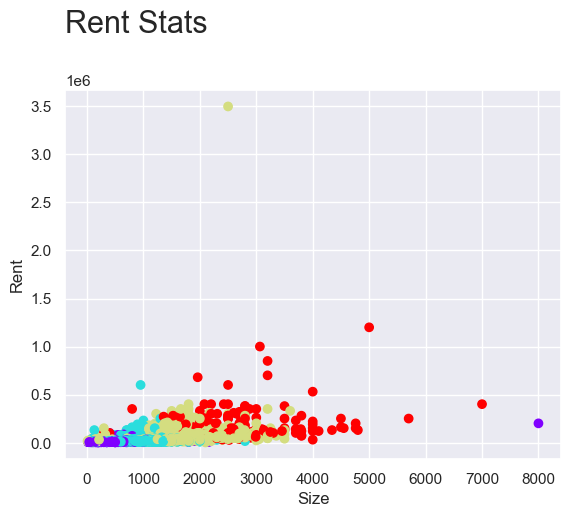

In [63]:
data_with_clusters = df_encoded.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Size'],data_with_clusters['Rent'],c=data_with_clusters['BHK'],cmap='rainbow')
plt.title('Rent Stats\n', loc='left', fontsize=22)
plt.xlabel('Size')
plt.ylabel('Rent')